In [39]:
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 

data = []
labels = []


shared_dir = '/Users/prateek/Desktop/ML/Major/augmented/'
infected_dir = shared_dir + 'True_parasitized/'
uninfected_dir = shared_dir + 'True_uninfected/'
input_shape = [32, 32]
batch = 32

def reading(path):
    mode = cv2.IMREAD_GRAYSCALE
    img_read = cv2.imread(path, mode)
    # img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
    img_read = np.float32(img_read)
    # img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2HSV_FULL)
    img_resize = cv2.resize(img_read, input_shape)
    return img_resize

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)

max_i = 100
i = 0
for img in parasitized_data:
    i+= 1
    if i == max_i:
        break
    try:
        data.append(reading(infected_dir + img))
        labels.append(1)
    except Exception as e:
        print(e)
    
i = 0
for img in uninfected_data:
    i+= 1
    if i == max_i:
        break
    try:
        data.append(reading(uninfected_dir + img))
        labels.append(0)
    except Exception as e:
        print(e)

input_shape.append(1)
image_data = np.array(data)
labels = np.array(labels)

print("image_shape:", input_shape)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_shape: [32, 32, 1]
image_data: 198
labels: 198


In [40]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.1,random_state = 0)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 178
X_test: 20
y_train: 178
y_test: 20


In [41]:
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras import Sequential

dropout_rate = 0.1

model = Sequential()
model.add(Conv2D(4, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=(4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(dropout_rate, name='feature_extractor'))
model.add(Dense(1, activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 4)         40        
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 8)         520       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 8)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 8)           0         
                                                                 
 flatten_5 (Flatten)         (None, 288)              

In [47]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
epochs = 30

accuracy_metrics = ['accuracy', 'binary_accuracy']
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=accuracy_metrics)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/30


2022-04-25 14:45:34.931324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 125ms/step - loss: 0.3930 - accuracy: 0.4813 - binary_accuracy: 0.4813 - val_loss: 1.2119 - val_accuracy: 0.5556 - val_binary_accuracy: 0.5556
Epoch 2/30
1/5 [=====>........................] - ETA: 0s - loss: 0.1116 - accuracy: 0.5312 - binary_accuracy: 0.5312

2022-04-25 14:45:35.856275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step - loss: 0.3780 - accuracy: 0.4813 - binary_accuracy: 0.4813 - val_loss: 1.1543 - val_accuracy: 0.5556 - val_binary_accuracy: 0.5556
Epoch 3/30
5/5 [==============================] - 0s 22ms/step - loss: 0.4591 - accuracy: 0.4813 - binary_accuracy: 0.4813 - val_loss: 1.1235 - val_accuracy: 0.5556 - val_binary_accuracy: 0.5556
Epoch 4/30
5/5 [==============================] - 0s 24ms/step - loss: 0.3317 - accuracy: 0.4813 - binary_accuracy: 0.4813 - val_loss: 0.8920 - val_accuracy: 0.5556 - val_binary_accuracy: 0.5556
Epoch 5/30
5/5 [==============================] - 0s 30ms/step - loss: 0.3426 - accuracy: 0.4813 - binary_accuracy: 0.4813 - val_loss: 0.6496 - val_accuracy: 0.5556 - val_binary_accuracy: 0.5556
Epoch 6/30
5/5 [==============================] - 0s 25ms/step - loss: 0.2899 - accuracy: 0.4813 - binary_accuracy: 0.4813 - val_loss: 0.7146 - val_accuracy: 0.5556 - val_binary_accuracy: 0.5556
Epoch 7/30
5/5 [====================

dict_keys(['loss', 'accuracy', 'binary_accuracy', 'val_loss', 'val_accuracy', 'val_binary_accuracy'])


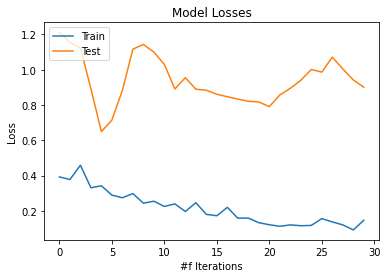

In [48]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Losses')
plt.ylabel('Loss')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'binary_accuracy', 'val_loss', 'val_accuracy', 'val_binary_accuracy'])


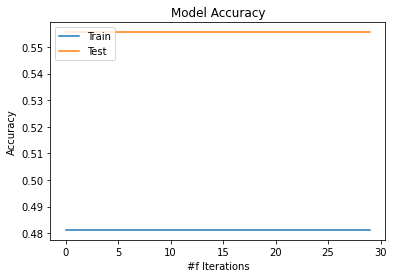

In [49]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
y_pred = model.predict(X_test)
print(y_pred)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


2022-04-25 14:45:40.425368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [51]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(confusion_matrix( y_test, y_pred ))
print( precision_score( y_test, y_pred, average='micro') )
print( recall_score( y_test, y_pred, average='micro') )

[[ 0  8]
 [ 0 12]]
0.6
0.6
